In [4]:
import pandas as pd

df = pd.read_csv('combined_census_data.csv')

df

,Region,Category,Feature,Label,Area_cnt,Area_ratio
0,Greater Sydney,People and population,People,Male,"2,585,238",49.4
1,Greater Sydney,People and population,People,Female,"2,645,912",50.6
2,Greater Sydney,People and population,Indigenous status,Aboriginal and/or Torres Strait Islander,"90,939",1.7
3,Greater Sydney,People and population,Indigenous status,Non-Indigenous,"4,916,487",94.0
4,Greater Sydney,People and population,Indigenous status,Indigenous status not stated,"223,727",4.3
...,...,...,...,...,...,...
3313,Burwood (NSW),Aboriginal and/or Torres Strait Islander peoples,Dwelling characteristics,Average number of people per household,1.9,NaN
3314,Burwood (NSW),Aboriginal and/or Torres Strait Islander peoples,Dwelling characteristics,Average number of people per bedroom,0.8,NaN
3315,Burwood (NSW),Aboriginal and/or Torres Strait Islander peoples,Dwelling characteristics,Median weekly household income (a),"1,687",NaN
3316,Burwood (NSW),Aboriginal and/or Torres Strait Islander peoples,Mortgage and rent,Median weekly rent (a),494,NaN


In [5]:
for name in list(df['Region'].unique()):
    temp = df[df['Region']==name]
    #print(temp.head())
    print(name, ':', len(temp))
        

Greater Sydney : 237
Bidwill - Hebersham - Emerton : 237
Lethbridge Park - Tregear : 237
St Marys - North St Marys : 237
Ashcroft - Busby - Miller : 237
West Pennant Hills : 237
Rose Bay - Vaucluse - Watsons Bay : 237
Lindfield - Roseville : 237
Hunters Hill - Woolwich : 237
Redfern : 237
Sydney (South) - Haymarket : 237
Ultimo : 237
Waterloo : 237
Burwood (NSW) : 237


In [6]:
lowers = list(df['Region'].unique())[1:5]
highers = list(df['Region'].unique())[5:9]
abnormals = list(df['Region'].unique())[9:]

    
df_sydney = df[df['Region']=='Greater Sydney']
df_low = df[df['Region'].isin(lowers)]
df_high = df[df['Region'].isin(highers)]
df_diff = df[df['Region'].isin(abnormals)]

print(len(df_sydney), len(df_low), len(df_high), len(df_diff))

237 948 948 1185


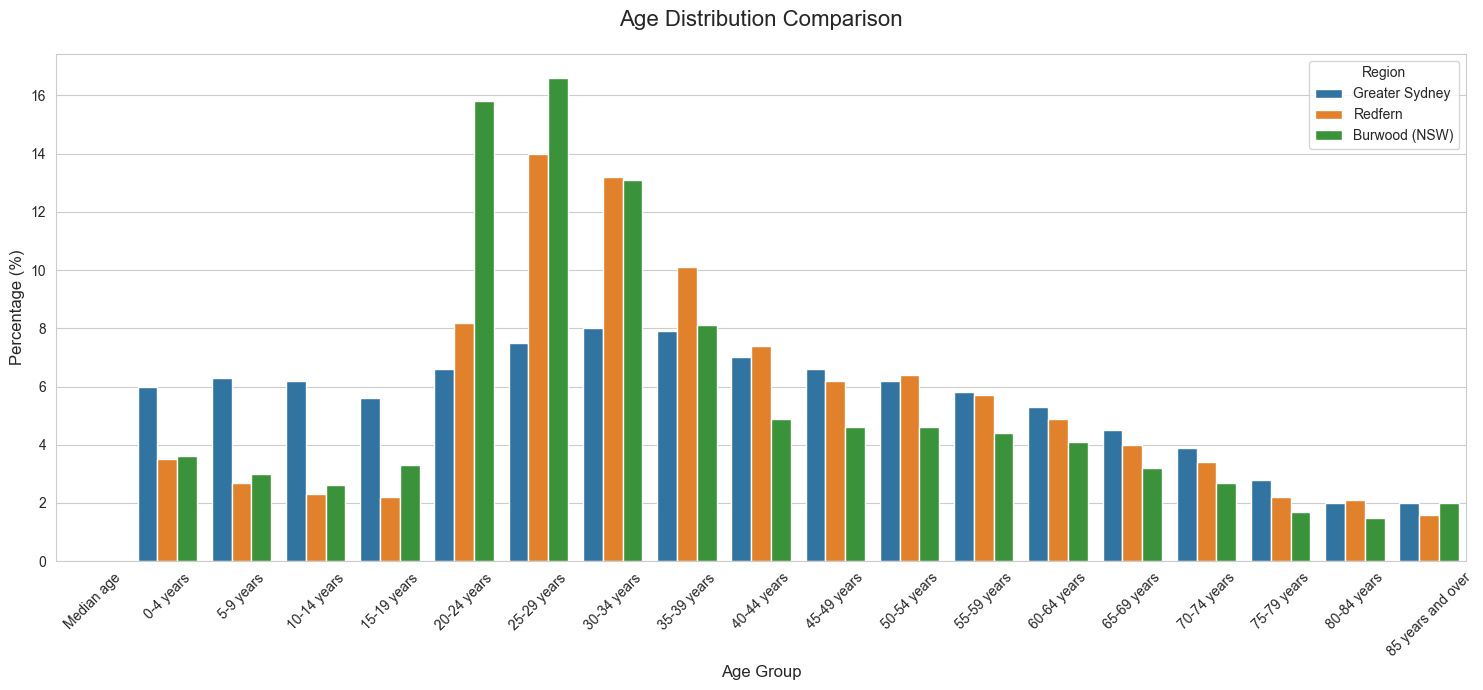

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 대상 지역 설정 (이미지상의 명칭인 'Burwood (NSW)' 등을 확인하세요)
target_regions = ['Greater Sydney', 'Redfern', 'Burwood (NSW)']

# 2. 데이터 필터링
# Category가 'People and population'이고 Feature가 'Age'인 행만 추출
age_df = df[(df['Region'].isin(target_regions)) & 
            (df['Category'] == 'People and population') & 
            (df['Feature'] == 'Age')].copy()

# 3. 데이터 전처리: Area_ratio를 숫자형으로 변환
age_df['Area_ratio'] = pd.to_numeric(age_df['Area_ratio'], errors='coerce')

# 4. 정렬 (나이순: 0-4, 5-9 ... 85+)
# 데이터프레임에 들어있는 순서대로 그리거나, 필요시 커스텀 정렬을 수행합니다.
# 보통 이 데이터셋은 이미 나이순으로 정렬되어 있는 경우가 많습니다.

# 5. 그래프 그리기
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# 막대 그래프 생성
sns.barplot(data=age_df, x='Label', y='Area_ratio', hue='Region')

# 그래프 디테일 설정
plt.title('Age Distribution Comparison', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45) # 라벨이 겹치지 않게 회전
plt.legend(title='Region')

plt.tight_layout()
plt.show()

In [8]:
import plotly.express as px

# 1. 대상 지역 설정 (정확한 명칭 확인 필수)
target_regions = ['Greater Sydney', 'Redfern', 'Burwood (NSW)']

# 2. 데이터 필터링 (기존과 동일)
age_df = df[(df['Region'].isin(target_regions)) & 
            (df['Category'] == 'People and population') & 
            (df['Feature'] == 'Age')].copy()

# 3. 데이터 타입 변환 및 정렬
age_df['Area_ratio'] = pd.to_numeric(age_df['Area_ratio'], errors='coerce')

# 4. Plotly Express로 그래프 그리기
fig = px.bar(age_df, 
             x='Label', 
             y='Area_ratio', 
             color='Region',           # 범례 및 색상 구분
             barmode='group',          # 막대를 옆으로 나열 (stack으로 바꾸면 쌓기 가능)
             title='Sydney Regions Age Distribution Comparison',
             labels={'Area_ratio': 'Percentage (%)', 'Label': 'Age Group'},
             hover_data={'Region': True, 'Area_ratio': ':.1f'} # 마우스 오버 시 소수점 한자리 표시
            )

# 5. 레이아웃 세부 설정 (X축 정렬 등)
fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='Regions',
    template='plotly_white' # 깔끔한 흰색 배경
)

# 그래프 출력
fig.show()

In [17]:
import plotly.express as px
import pandas as pd

# 1. 데이터 필터링 (기존과 동일)
target_regions = list(df['Region'].unique()) #['Greater Sydney', 'Redfern', 'Burwood (NSW)']
age_df = df[(df['Region'].isin(target_regions)) & 
            (df['Category'] == 'People and population') & 
            (df['Feature'] == 'Age')].copy()

# 2. 데이터 타입 변환
age_df['Area_ratio'] = pd.to_numeric(age_df['Area_ratio'], errors='coerce')

# 3. 그래프 생성
fig = px.bar(age_df, 
             x='Label', 
             y='Area_ratio', 
             color='Region',
             barmode='overlay',
             opacity= 0.7,
             title='Sydney Age Distribution (Click legend to compare)',
             labels={'Area_ratio': 'Percentage (%)', 'Label': 'Age Group'},
             template='plotly_white')


# 4. 초기 가시성(Visibility) 설정
# Greater Sydney는 보여주고, 나머지는 클릭 전까지 숨김('legendonly') 처리
for trace in fig.data:
    if trace.name != 'Greater Sydney':
        trace.visible = 'legendonly'

# 5. 레이아웃 조정
fig.update_layout(xaxis_tickangle=-45)
fig.update_xaxes(
    showgrid=True, 
    gridwidth=1, 
    gridcolor='LightGrey'
)
fig.update_traces(selector={'name': 'Greater Sydney'}, legendgroup='group', legendrank=1)
fig.show()